# Importing the dataset


In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

#  Load the California housing dataset

In [2]:
housing = fetch_openml(name='california_housing', version=1, as_frame=True)
housing_df=housing.frame
print(housing_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB
None


## Checking the ocean_proximity column

In [4]:
housing_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## Describing the dataset

In [5]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Plotting histogram

<Figure size 2500x2000 with 0 Axes>

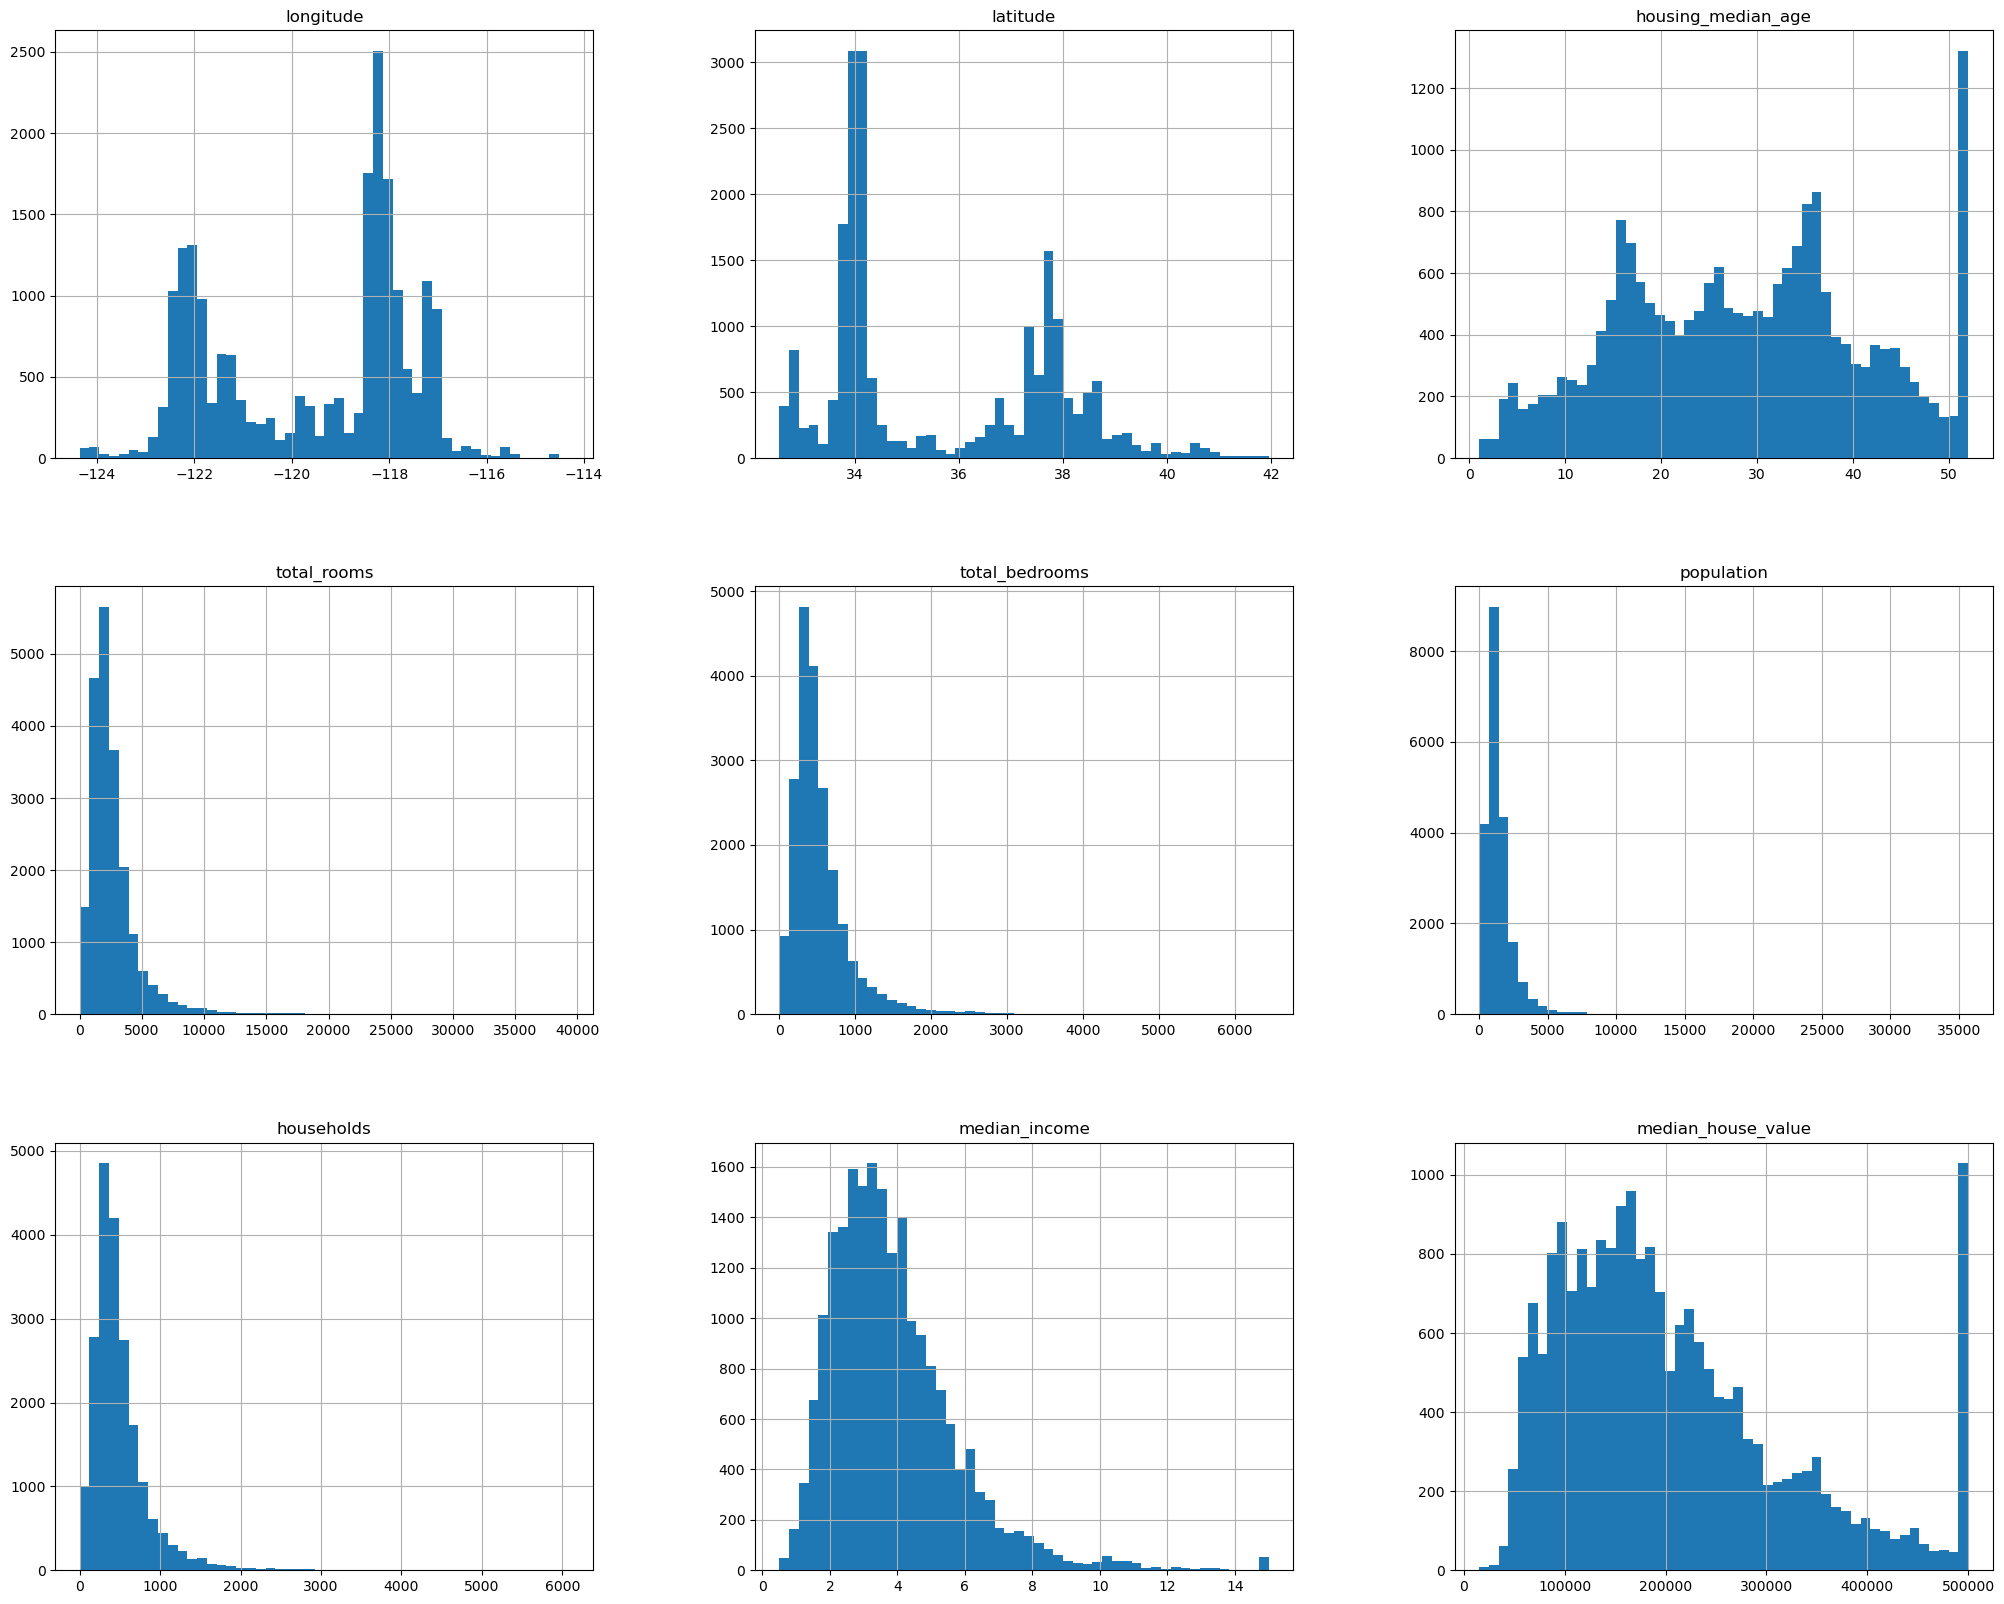

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(25, 20))

# Plot the histogram
housing_df.hist(bins=50, figsize=(25, 20))
plt.show()

# Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(housing_df,test_size=0.2,random_state=42)

<Axes: >

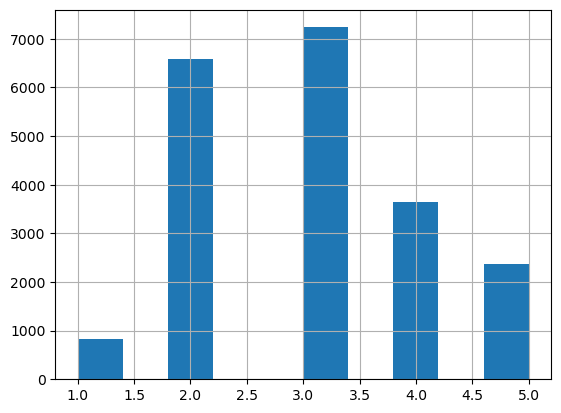

In [8]:
housing_df["income_cat"]=pd.cut(housing_df["median_income"], bins=[0.,1.5,3.0,4.5,6., np.inf], labels=[1,2,3,4,5])
housing_df["income_cat"].hist()

## stratified sampling based on the income category

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]


strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

## makeing a copy to work with data without modifying the test set

In [10]:
housing = strat_train_set.copy()

# Data visualization


<Axes: xlabel='longitude', ylabel='latitude'>

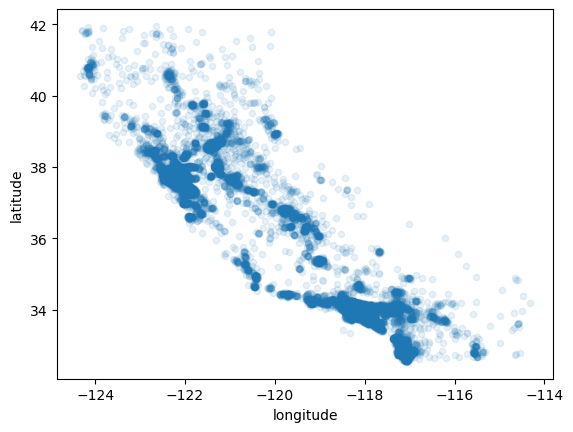

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

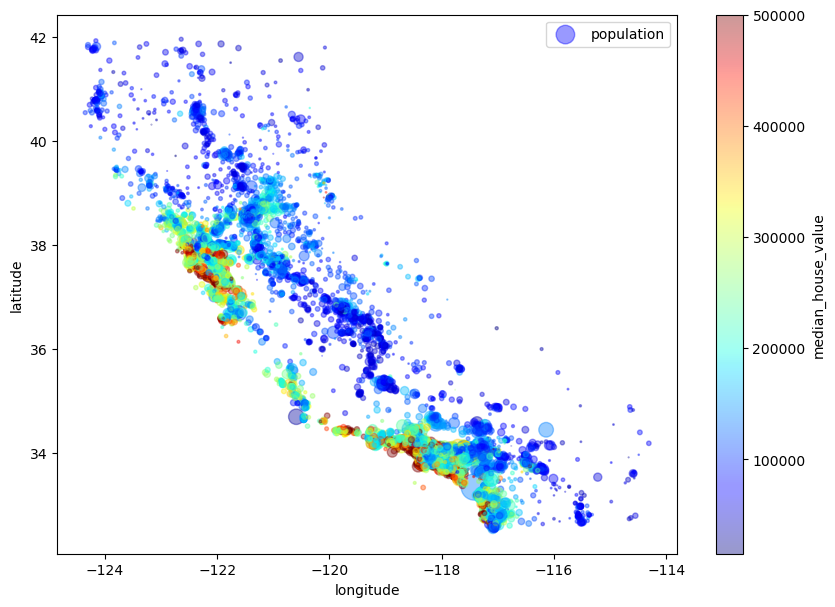

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=housing["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    )
plt.legend()

## Creating new features

In [13]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


## taking a clean dataset


In [14]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Data Cleaning

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [16]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [17]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [18]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

## Handling Text and Categorical Attributes

In [19]:
housing_cat = housing[["ocean_proximity"]]

In [20]:
# # using one hot encoder

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# housing_cat_1hot

# cat_encoder.categories_

# Custom Transformer

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        
        self.add_bedrooms_per_room = add_bedrooms_per_room 
        
    def fit(self, X, y=None):
        return self # nothing else to do 
        
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]


# Piplelines for feature scaling

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [23]:
# housing_num_tr = num_pipeline.fit_transform(housing_num)

## single transformer able to handle all col‐ umns, applying the appropriate transformations to each column

In [24]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline=ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [25]:
housing_prepared = full_pipeline.fit_transform(housing)

# Choosing and Training the model

In [27]:
# choosing decision tree

from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [28]:
#cross validation set generation and testing
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [34]:
#function to display score
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("SD: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [71529.38578253 70643.87591576 68671.88867662 71370.38031617
 69015.60400754 77384.53542701 73013.48651454 73096.3084669
 68534.74702137 70855.19194439]
Mean:  71411.54040728163
SD:  2520.275805192909


# This model is performed as bad so trying random forest regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores=cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [51226.72850089 48844.53638282 47056.39054049 52076.19930347
 47287.8458903  51943.70505051 52378.4243679  49632.97584828
 48912.72146429 53946.64355759]
Mean:  50330.61709065481
SD:  2200.1334278140166


## finding best hyperparameters for random forest regressor

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

# final model on test set

In [41]:
from sklearn.metrics import mean_squared_error

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions) 
final_rmse = np.sqrt(final_mse)
print(final_rmse)

48759.32351372488
